# Part I - Prosper Loan Data Exploration
## by Carolyne Masaku

## Introduction
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 



## Preliminary Wrangling


In [45]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [46]:
df=pd.read_csv('prosperLoanData.csv')
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [47]:
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [48]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [49]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

> There are 113937 loans in the dataset and 81 features. 61 features are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

> My main interest is to investigate the LoanStatus of the ProsperLoan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> CreditGrade, EmploymentStatus, BorrowerAPR,CurrentDelinquencies, IncomeRange, IncomeVerifiable, LoanOriginalAmount, Term, IsBorrowerHomeOwner, MonthlyLoanPayment will help in investigating into LoanStatus

## Univariate Exploration

> In this section, I am investigating distributions of individual variables.


My first step will be looking into the different categories of the Prosper LoanStatus

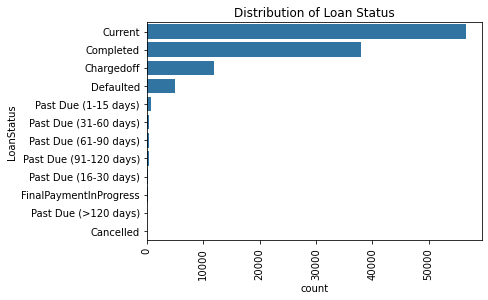

In [159]:
#plotting LoanStatus on a bar chart
base_color=sb.color_palette()[0]
type_order=df['LoanStatus'].value_counts().index
sb.countplot(data=df, y=df['LoanStatus'],color=base_color,order=type_order)
plt.title('Distribution of Loan Status')
plt.xticks(rotation=90);

In [156]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

<AxesSubplot:xlabel='CreditGrade', ylabel='count'>

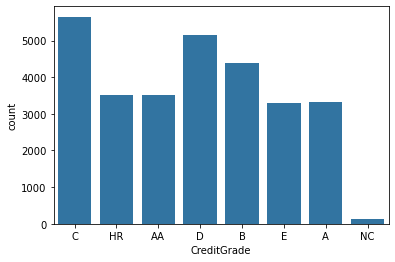

In [52]:
#plotting CrediGrade
base_color=sb.color_palette()[0]
sb.countplot(data=df, x=df['CreditGrade'],color=base_color)

In [53]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

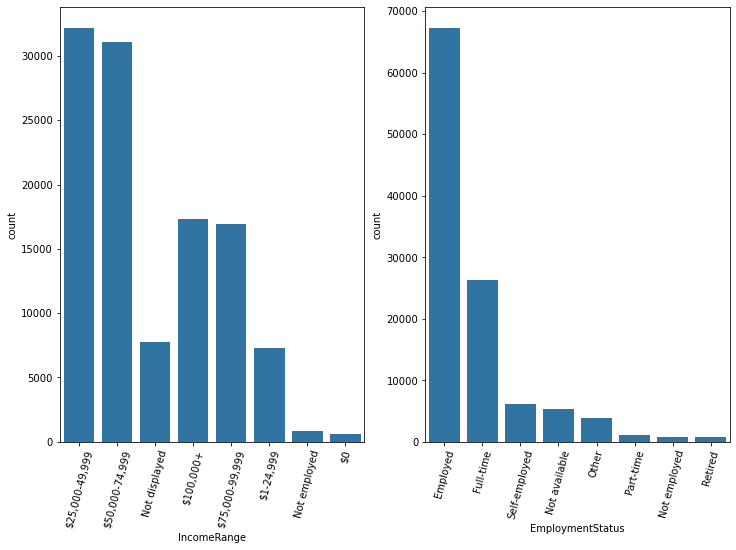

In [154]:
#plotting EmploymentStatus on a bar chart
#plotting IncomeRange on a bar plot
plt.figure(figsize=[12,8])
base_color=sb.color_palette()[0]
plt.subplot(1,2,1)
sb.countplot(data=df, x='IncomeRange',color=base_color)
plt.xticks(rotation=75)
plt.subplot(1,2,2)
sb.countplot(data=df, x=df['EmploymentStatus'],color=base_color,order=type_order)
plt.xticks(rotation=75);

In [65]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

(-1.1077175230142817,
 1.1009008911302427,
 -1.1076876770640927,
 1.1009307370804318)

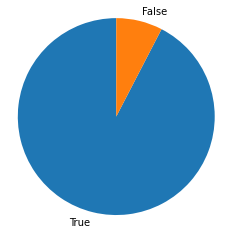

In [59]:
#plotting pie chart for IncomeVerifiable feature
sorted_counts=df.IncomeVerifiable.value_counts()
plt.pie(sorted_counts,labels=sorted_counts.index,startangle=90, counterclock=True)
plt.axis('square')

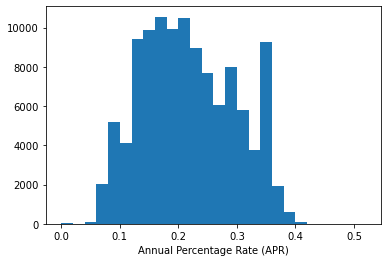

In [66]:
#Checking the distribution of BorrowerAPR(with a binsize of 0.02)
bins=np.arange(0,df['BorrowerAPR'].max()+0.02,0.02)
plt.hist(data=df,x='BorrowerAPR',bins=bins)
plt.xlabel('Annual Percentage Rate (APR)');

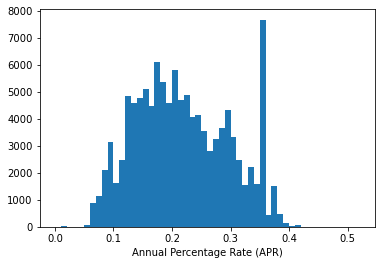

In [69]:
#Checking the distribution of BorrowerAPR(with a binsize of 0.01)
bins=np.arange(0,df['BorrowerAPR'].max()+0.01,0.01)
plt.hist(data=df,x='BorrowerAPR',bins=bins)
plt.xlabel('Annual Percentage Rate (APR)');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were no any unusual points and thus no transformation required.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **LoanStatus** Most of the loans are in the "Current" Loan status, followed by those that are "completed"

> **EmploymentStatus** From the bar plot, most of the people taking up loans are the Employed, with the least being the retired.

> **IncomeRange** The highest number of people taking up loans have an Income range of between $25,000 and $49,999, followed closely by those earning between $50,000 and $74,999.

> **Borrower APR** In this case, a smaller binsize gives a more defined distribution of the APR. The distribution looks unimodal.

## Bivariate Exploration

> In this section, I will be investigating relationships between pairs of variables in my
data.

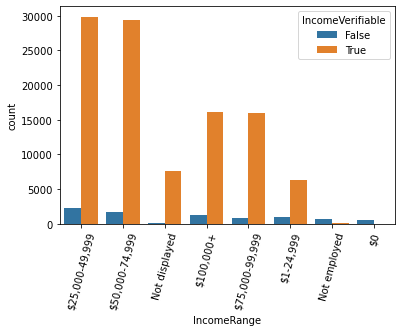

In [88]:
#Check relationship between IncomeRange and IncomeVerifiable-Qual and Qual-clustered bar
sb.countplot(data=df,x='IncomeRange',hue='IncomeVerifiable')
plt.xticks(rotation=75);

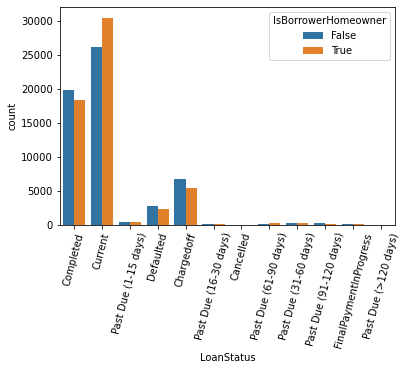

In [132]:
#IsBorrowerHomeowner vs LoanStatus
sb.countplot(data=df,x='LoanStatus',hue='IsBorrowerHomeowner')
plt.xticks(rotation=75);

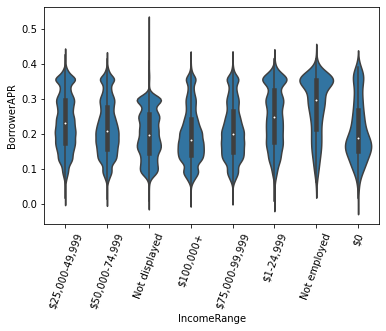

In [89]:
#Check relationship between LoanStatus and BorrowerAPR-qual and quant-Violin or boxplot
base_color=sb.color_palette()[0]
sb.violinplot(data=df,x='IncomeRange',y='BorrowerAPR',color=base_color)
plt.xticks(rotation=70);

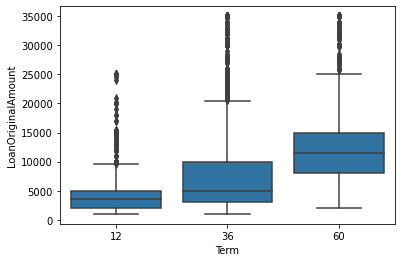

In [129]:
#Relationship between Term of loan and LoanOriginalAmount
base_color=sb.color_palette()[0]
sb.boxplot(data=df,x='Term',y='LoanOriginalAmount',color=base_color);

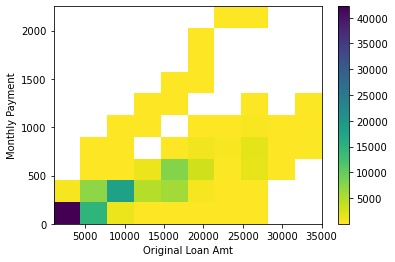

In [139]:
#Relationship between MonthlyLoanPayment and OriginalLoanAmount
plt.hist2d(data = df, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Original Loan Amt')
plt.ylabel('Monthly Payment');

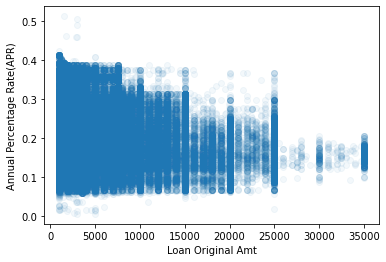

In [77]:
#Relationship between LoanOriginalAmount and Borrower APR-scatter
plt.scatter(data=df,x='LoanOriginalAmount',y='BorrowerAPR',alpha=1/20)
plt.xlabel('Loan Original Amt')
plt.ylabel('Annual Percentage Rate(APR)');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>**IncomeRange** and **IncomeVerifiable**- There seems to be a small number of persons whose income is not verifiable. Generally, most of the persons who took a loan have there income verifiable.

>**LoanStatus** and **IsBorrowerHomeOwner**- There is an even distribution of the Loan Status and whether a borrower is a homeowner or not.

> **IncomeRange** and **BorrowerAPR**- Persons who are not employed seem to have a higher modal BorowerAPR as compared to those in other Income ranges.

> **Term** and **LoanOriginalAmount** -Smaller amounts loans have a shorter term(12 months) with a few outliers with bigger loans having a longer term period.

> **LoanOriginalAmount** and **MonthlyPayment**- Bigger loans have bigger monthly payments as expected.

> **LoanOriginalAmount** and **BorrowerAPR** have no significant correlation. This can be interpreted as that, the APR is standardize regardless of the amount of loan taken.



## Multivariate Exploration
> In this section, I will be investigating relationships between multiple(more than 2) variables in my dataset

C:\Users\CMasaku\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\CMasaku\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


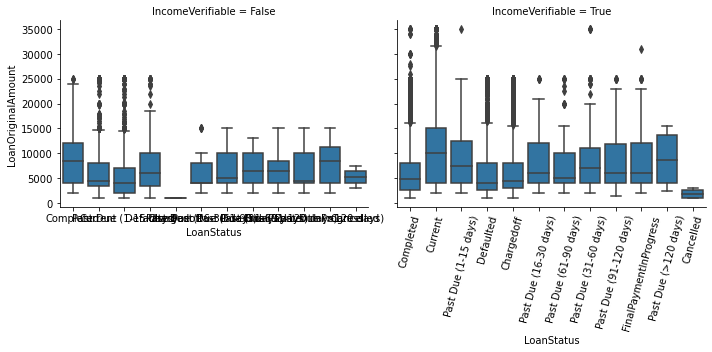

In [153]:
#boxplot for the relationship between IncomeVerifiable, LoanStatus and LoanOriginalAmount
g = sb.FacetGrid(data = df, col = 'IncomeVerifiable', size = 5,margin_titles=True)
g.map(sb.boxplot, 'LoanStatus', 'LoanOriginalAmount')
plt.xticks(rotation=75);

C:\Users\CMasaku\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


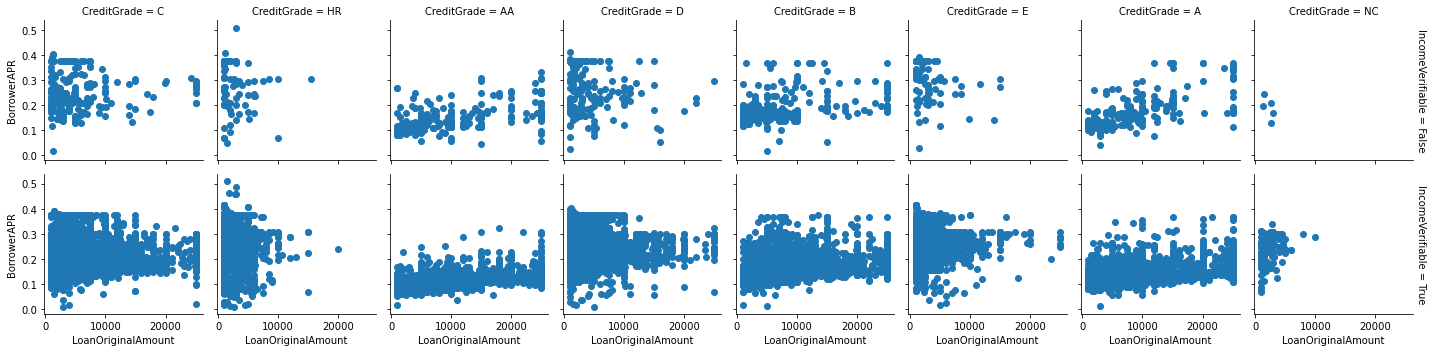

In [115]:
g = sb.FacetGrid(data = df, col = 'CreditGrade', row = 'IncomeVerifiable', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')

C:\Users\CMasaku\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


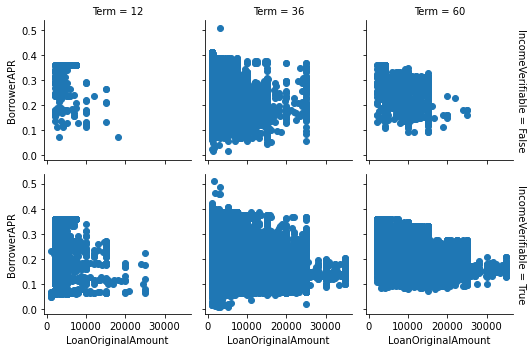

In [127]:
g = sb.FacetGrid(data = df, col = 'Term', row = 'IncomeVerifiable', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')

C:\Users\CMasaku\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\CMasaku\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


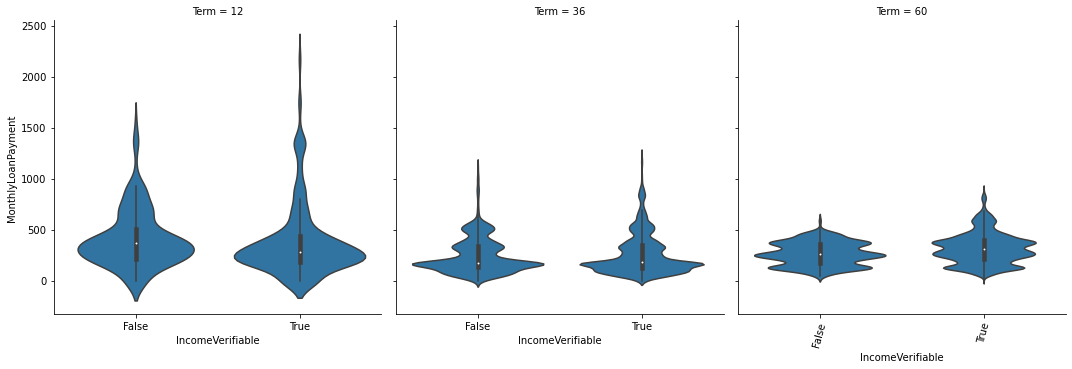

In [142]:
#IncomeVerifiable, Term and MonthlyLoanPayment
g = sb.FacetGrid(data = df, col = 'Term', size = 5,margin_titles=True)
g.map(sb.violinplot, 'IncomeVerifiable', 'MonthlyLoanPayment')
plt.xticks(rotation=75);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

### Were there any interesting or surprising interactions between features?

> I went further in my investigation and checked for any relationships between **IncomeVerifiable, LoanStatus and LoanOriginalAmount** ,Persons whose Income is verifiable get bigger amounts of loans-Possibly because they are expected to be settle the loans with ease.

> Looking at the second and third multivariate plot, there doesn't seem to be any interaction between each of the 3 variables in each plot.

> Also, looking at **IncomeVerifiable, Term and MonthlyLoanPayment** ,Persons with loans with a shorter term pay a uniformly higher amount of installment as compared to those with a longer term.

## Conclusions
>I have done the 3 levels of exploration: Univariate, bivariate and multivariate.


Proper Loan has a good record looking into their Loan Status. Most of their loans are current and completed, with a smaller number of loans being in the other categories especially the defaulted category.

For person's whose income is verifiable, they are likely to qualify for bigger amounts of loans. This makes sense even in real-world case scenario.